<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

# 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [42]:
def eight_sided_dice():
    weights = [1, 2, 3, 4, 5, 6, 7, 8] # weights are proportional to face value
    total_weight = sum(weights)
    while True:
        chosen = random.choices(range(1, 9), weights=weights)[0]
        yield chosen

In [45]:
d = eight_sided_dice()

# Roll the dice 10 times
for i in range(10):
    print(next(d))

5
5
8
3
8
8
8
3
8
7


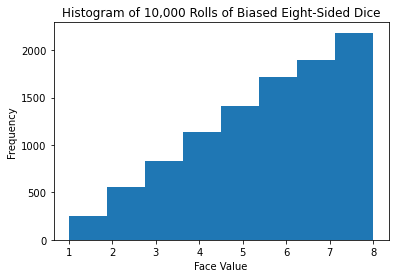

In [46]:
import matplotlib.pyplot as plt

# Define the biased eight-sided dice generator function
def eight_sided_dice():
    weights = [1, 2, 3, 4, 5, 6, 7, 8] # weights are proportional to face value
    total_weight = sum(weights)
    while True:
        chosen = random.choices(range(1, 9), weights=weights)[0]
        yield chosen

# Create a generator object for the biased eight-sided dice
d = eight_sided_dice()

# Roll the dice 10,000 times and store the results in a list
results = []
for i in range(10000):
    result = next(d)
    results.append(result)

# Plot a histogram of the results
plt.hist(results, bins=8)
plt.title("Histogram of 10,000 Rolls of Biased Eight-Sided Dice")
plt.xlabel("Face Value")
plt.ylabel("Frequency")
plt.show()

In [47]:
import time

def eight_sided_dice():
    weights = [1, 2, 3, 4, 5, 6, 7, 8]
    total_weight = sum(weights)
    start_time = time.time()
    seen_values = set()
    while True:
        chosen = random.choices(range(1, 9), weights=weights)[0]
        yield chosen
        seen_values.add(chosen)
        if len(seen_values) == 8:
            end_time = time.time()
            elapsed_time = end_time - start_time
            return elapsed_time


In [48]:
d = eight_sided_dice()

elapsed_time = next(d)

print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time: 8.00 seconds


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [32]:
import random
import time

class Elevator:
    def __init__(self, num_floors, elevator_id):
        self.num_floors = num_floors
        self.current_floor = 1
        self.users = []
        self.sequence = []
        self.stops = [0] * (num_floors + 1)
        self.elevator_id = elevator_id

    def call(self, floor):
        if floor < 1 or floor > self.num_floors:
            print(f"Error: floor {floor} does not exist.")
        else:
            self.sequence.append(floor)
            if floor > self.current_floor:
                self.sequence.sort()
            else:
                self.sequence.sort(reverse=True)

    def go_to(self, floor):
        if floor < 1 or floor > self.num_floors:
            print(f"Error: floor {floor} does not exist.")
        else:
            self.sequence.append(floor)
            self.sequence.sort()
    
    def move(self):
        if not self.sequence:
            return
        next_floor = self.sequence.pop(0)
        if next_floor == self.current_floor:
            return
        travel_time = abs(next_floor - self.current_floor) * 5
        stop_time = 10 if self.stops[next_floor] == 0 else 5
        self.current_floor = next_floor
        self.stops[next_floor] += 1
        self.users = [u for u in self.users if u.destination != self.current_floor]
        for u in self.users:
            if u.destination > self.current_floor:
                self.sequence.append(u.destination)
        self.sequence.sort()
        print(f"Elevator is now at floor {self.current_floor}.")
        time.sleep(travel_time + stop_time)

    def add_user(self, user):
        self.users.append(user)
        self.go_to(user.destination)
    
    def run(self):
        while True:
            self.move()
            if not self.users and not self.sequence:
                print("Elevator is idle.")
                break
            for u in list(self.users):
                if u.destination == self.current_floor:
                    self.users.remove(u)
                    print(f"User {u.id} has left the elevator.")
            for u in User.generate_users(1):
                if u.call_floor == self.current_floor:
                    self.add_user(u)
                    print(f"User {u.id} has entered the elevator.")
            self.print_building()
    
    def print_building(self):
        for floor in range(self.num_floors, 0, -1):
            if floor == self.current_floor:
                print(f"[{floor:2d}] >Elevator is here")
            elif floor in self.sequence:
                print(f"[{floor:2d}] *")
            else:
                print(f"[{floor:2d}]")
        print("=" * (4 * self.num_floors + 1))

class User:
    _id = 0

    def __init__(self, call_floor, destination):
        self.id = User._id
        User._id += 1
        self.call_floor = call_floor
        self.destination = destination

    @staticmethod
    def generate_users(num_users):
        for i in range(num_users):
            call_floor = random.randint(1, 10)
            destination = random.randint(1, 10)
            while destination == call_floor:
                destination = random.randint(1, 10)
            yield User(call_floor, destination)

In [34]:
elevator = Elevator(num_floors=10, elevator_id=1)
for u in User.generate_users(10):
    elevator.call(u.call_floor)
elevator.run()

[10]
[ 9] *
[ 8] *
[ 7] *
[ 6] *
[ 5] *
[ 4]
[ 3]
[ 2] *
[ 1] >Elevator is here
[10]
[ 9] *
[ 8] *
[ 7] *
[ 6] *
[ 5] *
[ 4]
[ 3]
[ 2] *
[ 1] >Elevator is here
Elevator is now at floor 2.
[10]
[ 9] *
[ 8] *
[ 7] *
[ 6] *
[ 5] *
[ 4]
[ 3]
[ 2] >Elevator is here
[ 1]
Elevator is now at floor 5.
[10]
[ 9] *
[ 8] *
[ 7] *
[ 6] *
[ 5] >Elevator is here
[ 4]
[ 3]
[ 2]
[ 1]
[10]
[ 9] *
[ 8] *
[ 7] *
[ 6] *
[ 5] >Elevator is here
[ 4]
[ 3]
[ 2]
[ 1]
Elevator is now at floor 6.
[10]
[ 9] *
[ 8] *
[ 7] *
[ 6] >Elevator is here
[ 5]
[ 4]
[ 3]
[ 2]
[ 1]
Elevator is now at floor 7.
[10]
[ 9] *
[ 8] *
[ 7] >Elevator is here
[ 6]
[ 5]
[ 4]
[ 3]
[ 2]
[ 1]
[10]
[ 9] *
[ 8] *
[ 7] >Elevator is here
[ 6]
[ 5]
[ 4]
[ 3]
[ 2]
[ 1]
Elevator is now at floor 8.
[10]
[ 9] *
[ 8] >Elevator is here
[ 7]
[ 6]
[ 5]
[ 4]
[ 3]
[ 2]
[ 1]
Elevator is now at floor 9.
Elevator is idle.


In [35]:
class Building:
    def __init__(self, num_floors, num_elevators):
        self.num_floors = num_floors
        self.elevators = []
        for i in range(num_elevators):
            elevator = Elevator(num_floors, elevator_id=i)
            self.elevators.append(elevator)
    
    def call_elevator(self, floor, destination):
        best_elevator = None
        best_distance = float('inf')
        for elevator in self.elevators:
            if floor in elevator.sequence or destination in elevator.sequence:
                continue
            if elevator.direction == 0:
                distance = abs(elevator.current_floor - floor)
            elif elevator.direction > 0 and floor >= elevator.current_floor:
                distance = floor - elevator.current_floor
            elif elevator.direction < 0 and floor <= elevator.current_floor:
                distance = elevator.current_floor - floor
            else:
                distance = abs(elevator.current_floor - floor) + abs(destination - floor)
            if distance < best_distance:
                best_elevator = elevator
                best_distance = distance
        if best_elevator is not None:
            best_elevator.call_elevator(floor, destination)
    
    def step(self):
        for elevator in self.elevators:
            elevator.step()
    
    def print_building(self):
        for floor in range(self.num_floors, 0, -1):
            elevators = [f"E{elevator.elevator_id}" if elevator.current_floor == floor else "  " for elevator in self.elevators]
            if floor == self.num_floors:
                print(f"{' '.join(elevators)}")
            if floor == self.num_floors:
                print(f"[{floor:2d}] {' '.join(elevators)}")
            else:
                print(f"[{floor:2d}] {' '.join(elevators)}")
        print("=" * (4 * self.num_floors + 1))


In [36]:
building = Building(num_floors=10, num_elevators=2)

for i in range(10):
    floor = random.randint(1, 10)
    destination = random.randint(1, 10)
    building.call_elevator(floor, destination)

for i in range(60):
    building.step()
    building.print_building()
    time.sleep(0.5)

AttributeError: 'Elevator' object has no attribute 'direction'